In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Genome:
    def __init__(self, n_chr, n_loci):
        self.n_chr = n_chr
        self.n_loci = n_loci
        self.shape = (self.n_chr, self.n_loci)
        
class Trait:
    def __init__(self, genome, founder_population, target_mean, target_variance):
        #store attributes
        self.target_mean = target_mean
        self.target_variance = target_variance
        
        #sample initial random effects
        random_effects = np.random.randn(g.n_chr, g.n_loci)
        #calculate the founder_population mean and var given these effects
        founder_scores = np.array([random_effects @ x.haplotype for x in population.individuals])
        founder_mean, founder_var = founder_scores.mean(), founder_scores.var()
        #scale the random effects to match our target variance
        scaling_factors = np.sqrt(self.target_variance / founder_var)
        random_effects *= scaling_factors
        self.effects = random_effects
        
        self.intercept = target_mean - founder_mean
        
    def __matmul__(self,other):
        if isinstance(other,Individual):
            return self.effects * other.haplotype + self.intercept
        elif isinstance(other, Population):
            return np.sum(np.array([self @ ind + self.intercept for ind in other.individuals]), axis=(1,2))
        
class Population:
    def __init__(self, genome, size):
        self.genome = genome
        self.size = size
        self.individuals = self._create_initial_population()

    def _create_initial_population(self):
        """Create an initial population of founder individuals."""
        return [Individual(self.genome) for _ in range(self.size)]
    
    def get_dosages(self):
        return np.array([x.haplotype for x in self.individuals])

    def __repr__(self):
        return f'Population of size: {self.size}'


class Individual:
    def __init__(self, genome,haplotype=None, mother = None, father = None, descendants = 0, source='founder'):
        self.genome = genome  # must be Genome class
        self.haplotype = None
        self.source = source  # 'founder', 'cross', 'self', 'dh'
        self.descendents = []
        self.fitness = 0

        
        # Logic for setting haplotype,mother,father
        if self.source == 'founder':
            self.haplotype= self._generate_random_haplotype()
            self.mother = None
            self.father = None
        elif self.source == 'cross':
            self.haplotype = haplotype
            self.mother = mother
            self.father = father
        elif self.source == 'dh' or self.source == 'self':
            self.haplotype = haplotype
            self.mother = mother
            self.father = mother
        else:
            raise ValueError(f"Invalid source: {source}")
        
    def __repr__(self):
        return f'Individual with haplotype shape: {self.haplotype.shape}'

    def _generate_random_haplotype(self):
        """Generate a random haplotype for the individual."""
        return np.random.choice([0, 1], size=(self.genome.n_chr, self.genome.n_loci))
    
class Trait:
    def __init__(self, genome, founder_population, target_mean, target_variance):
        #store attributes
        self.target_mean = target_mean
        self.target_variance = target_variance
        
        #sample initial random effects
        random_effects = np.random.randn(g.n_chr, g.n_loci)
        #calculate the founder_population mean and var given these effects
        
        founder_scores = np.einsum('ij,kij->k',random_effects, population.get_dosages())
        founder_mean, founder_var = founder_scores.mean(), founder_scores.var()
        #scale the random effects to match our target variance
        scaling_factors = np.sqrt(self.target_variance / founder_var)
        random_effects *= scaling_factors
        self.effects = random_effects
        
        self.intercept = target_mean - founder_mean
        
    def __matmul__(self,other):
        if isinstance(other,Individual):
            return self.effects * other.haplotype
        elif isinstance(other, Population):
            return np.sum(np.array([self @ ind for ind in other.individuals]), axis=(1,2))
# Example usage
g = Genome(3, 77)
#make population with 100 founder individuals
population = Population(g, size=100)
#make a trait
trait = Trait(g, population,0,1)
# how to do trait @ population to get the trait values for a population?


(array([ 2.,  7.,  9., 33., 48., 68., 37., 20.,  6.,  1.]),
 array([-0.38460236, -0.31016351, -0.23572466, -0.16128582, -0.08684697,
        -0.01240812,  0.06203073,  0.13646958,  0.21090842,  0.28534727,
         0.35978612]),
 <BarContainer object of 10 artists>)

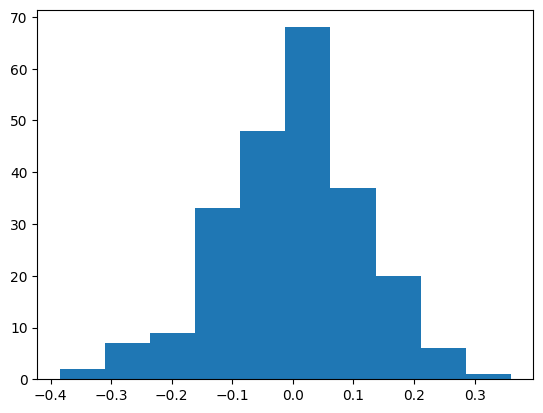

In [ ]:
plt.hist(trait.effects.flatten())

In [ ]:
target_mean = 5
target_variance = 2

#sample initial random effects
random_effects = np.random.randn(g.n_chr, g.n_loci)

In [ ]:
fx = random_effects; fx.shape

(3, 77)

In [ ]:
fxe = np.expand_dims(fx, axis = 0); fxe.shape

(1, 3, 77)

In [ ]:
haplo = np.array([x.haplotype for x in population.individuals]); haplo.shape

(100, 3, 77)